In [56]:
import json
import matplotlib
from matplotlib import pyplot as plt
import pickle
import sklearn
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

In [57]:
from sklearn.metrics import (mean_absolute_error, 
                             mean_absolute_percentage_error,
                             mean_squared_error)

# Binned Data

In [58]:
oresults_path = '../predicted-results/original/nbins-10'
mresults_path = '../predicted-results/mixed5050/nbins-10'
eresults_path = '../predicted-results/everything/nbins-10'

omodels_path = '../models/original'
mmodels_path = '../models/mixed5050/nbins-10'
emodels_path = '../models/everything/nbins-10'

test_sets = ['5050', '2575', 'everything']

mpoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 'all']
epoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 'all']



In [92]:
with open(f'{emodels_path}/set_1/COF_all.pickle', 'rb') as cof:
    emodel_cof = pickle.load(cof)

with open(f'{emodels_path}/set_1/intercept_all.pickle', 'rb') as f0:
    emodel_f0 = pickle.load(f0)

In [96]:
target = "COF"
tset = "5050"
with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
    model = pickle.load(f)
with open(f'{omodels_path}/{target}.ptxt', 'rb') as f:
    features = pickle.load(f)
with open(f'{oresults_path}/{target}_on_{tset}.json', 'r') as f:
    data = json.load(f)
results[tset][target]['original'] = {
#             'model': model,
#             'features': features,
#             'data': data,
      'n_train': len(model.oob_prediction_),
      'r_square': data[target]['r_square']
}

sim = list() 
prd = list()
for j in data[target]:
    if j != "r_square":
        sim.append(data[target][j][f"simulated-{target}"])
        prd.append(data[target][j][f"predicted-{target}"])


In [99]:
results = {'5050': {'COF': dict(),
                    'intercept': dict()},
           '2575': {'COF': dict(),
                    'intercept': dict()},
           'everything': {'COF': dict(),
                          'intercept': dict()}}
# First deal with the original models 
for tset in results:
    for target in ['COF', 'intercept']:
        with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
            model = pickle.load(f)
        with open(f'{omodels_path}/{target}.ptxt', 'rb') as f:
            features = pickle.load(f)
        with open(f'{oresults_path}/{target}_on_{tset}.json', 'r') as f:
            data = json.load(f)
        results[tset][target]['original'] = {
#             'model': model,
#             'features': features,
#             'data': data,
              'n_train': len(model.oob_prediction_),
              'r_square': data[target]['r_square']
        }
        
        sim = list() 
        prd = list()
        for j in data[target]:
            if j != "r_square":
                sim.append(data[target][j][f"simulated-{target}"])
                prd.append(data[target][j][f"predicted-{target}"])
                
        # Calculate MAE and MAPE 
        results[tset][target]['original']['mae'] = mean_absolute_error(sim, prd)
        results[tset][target]['original']['mape'] = mean_absolute_percentage_error(sim, prd)
        results[tset][target]['original']['mse'] = mean_squared_error(sim, prd)
        
# Then deal with the 5050 mixed models 
for tset in results:
    for i in range(5):
        for point in mpoints:
            for target in ['COF', 'intercept']:
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{mresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                    
                sim = list()
                prd = list() 
                for j in data[target]:
                    if j != "r_square":
                        sim.append(data[target][j][f"simulated-{target}"])
                        prd.append(data[target][j][f"predicted-{target}"])

                    # Calculate MAE and MAPE 
                    mae = mean_absolute_error(sim, prd)
                    mape = mean_absolute_percentage_error(sim, prd)
                    mse = mean_squared_error(sim, prd)
                if i == 0:
                    results[tset][target][f'5050_{point}'] = {
    #                 'model': model,
    #                 'features': features,
    #                 'data': data,
                      'n_train': len(model.oob_prediction_),
                      'r_square': [data[target]['r_square']],
                      'mae': [mae],
                      'mape': [mape],
                      'mse': [mse]
                    }
                else:
                    results[tset][target][f'5050_{point}']['r_square'].append(data[target]['r_square'])
                    results[tset][target][f'5050_{point}']['mae'].append(mae)
                    results[tset][target][f'5050_{point}']['mape'].append(mape)
                    results[tset][target][f'5050_{point}']['mse'].append(mse)
                    

# Lastly deal with the everything models
for tset in results:
    for i in range(5):
        for point in epoints:
            for target in ['COF', 'intercept']:
                with open(f'{emodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{emodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{eresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                    
                sim = list()
                prd = list() 
                
                for j in data[target]:
                    if j != "r_square":
                        sim.append(data[target][j][f"simulated-{target}"])
                        prd.append(data[target][j][f"predicted-{target}"])

                    # Calculate MAE and MAPE 
                    mae = mean_absolute_error(sim, prd)
                    mape = mean_absolute_percentage_error(sim, prd)
                    mse = mean_squared_error(sim, prd)
                    
                if i == 0:
                    results[tset][target][f'everything_{point}'] = {
    #                 'model': model,
    #                 'features': features,
    #                 'data': data,
                      'n_train': len(model.oob_prediction_),
                      'r_square': [data[target]['r_square']],
                      'mae': [mae],
                      'mape': [mape],
                      'mse': [mse]
                    }
                else:
                    results[tset][target][f'everything_{point}']['r_square'].append(data[target]['r_square'])
                    results[tset][target][f'everything_{point}']['mae'].append(mae)
                    results[tset][target][f'everything_{point}']['mape'].append(mape)
                    results[tset][target][f'everything_{point}']['mse'].append(mse)


In [100]:
for tset in results:
    for target in ['COF', 'intercept']:
        for point in mpoints:
            # doi: dict of interest
            doi = results[tset][target][f'5050_{point}']
            doi['r_square_avg'] = np.average(doi['r_square'])
            doi['r_square_std'] = np.std(doi['r_square'])
            doi['mae_avg'] = np.average(doi['mae'])
            doi['mae_std'] = np.std(doi['mae'])
            doi['mape_avg'] = np.average(doi['mape'])
            doi['mape_std'] = np.std(doi['mape'])
            doi['mse_avg'] = np.average(doi['mse'])
            doi['mse_std'] = np.std(doi['mse'])
        for point in epoints:
            doi = results[tset][target][f'everything_{point}']
            doi['r_square_avg'] = np.average(doi['r_square'])
            doi['r_square_std'] = np.std(doi['r_square'])
            doi['mae_avg'] = np.average(doi['mae'])
            doi['mae_std'] = np.std(doi['mae'])
            doi['mape_avg'] = np.average(doi['mape'])
            doi['mape_std'] = np.std(doi['mape'])
            doi['mse_avg'] = np.average(doi['mse'])
            doi['mse_std'] = np.std(doi['mse'])

## Refined R<sup>2</sup> plot
### Mixed 5050 models on 5050 test set

In [101]:
from numpy import *
from matplotlib.pyplot import *

In [102]:
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'DejaVu Sans:italic'
rcParams['mathtext.bf'] = 'DejaVu Sans:italic:bold'


In [103]:
markersize=6
COF_color = 'dodgerblue'
F0_color = 'firebrick'

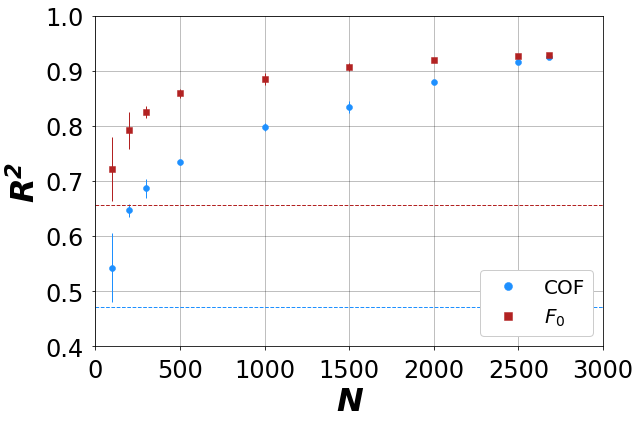

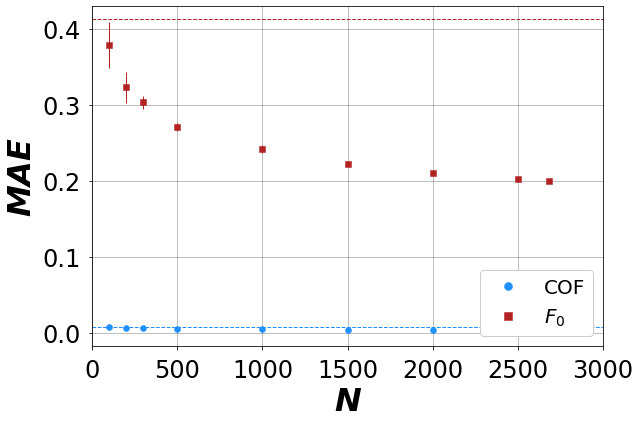

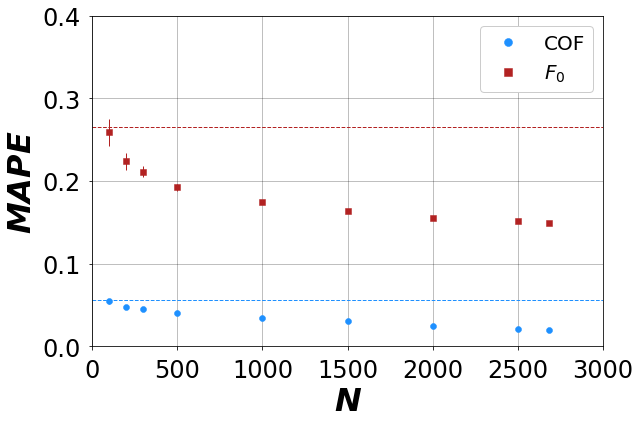

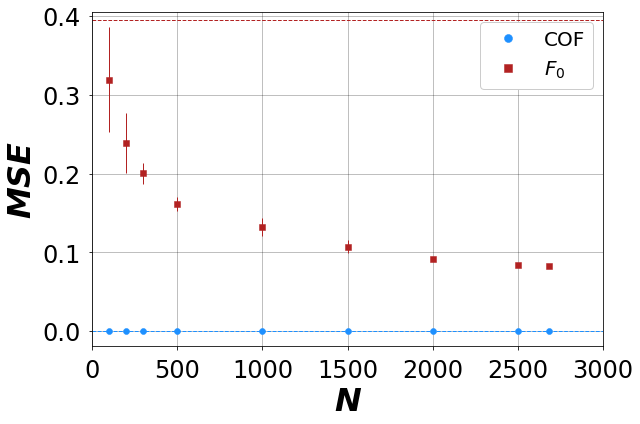

In [141]:
to_plot_on_5050 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'mae_avg': list(),
                           'mae_std': list(), 
                           'mape_avg': list(),
                           'mape_std': list(),
                           'mse_avg': list(),
                           'mse_std': list(),
                           'base_r_square': None,
                           'base_mae': None, 
                           'base_mape': None,
                           'bse_mse': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'mae_avg': list(),
                                 'mae_std': list(), 
                                 'mape_avg': list(),
                                 'mape_std': list(),
                                 'mse_avg': list(),
                                 'mse_std': list(),
                                 'base_r_square': None,
                                 'base_mae': None, 
                                 'base_mape': None,
                                 'base_mse': None}}
for target in ['COF', 'intercept']:
    for model, data in results['5050'][target].items():
        if '5050' in model:
            to_plot_on_5050[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_5050[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_5050[target]['mae_avg'].append(data['mae_avg'])
            to_plot_on_5050[target]['mae_std'].append(data['mae_std'])
            to_plot_on_5050[target]['mape_avg'].append(data['mape_avg'])
            to_plot_on_5050[target]['mape_std'].append(data['mape_std'])
            to_plot_on_5050[target]['mse_avg'].append(data['mse_avg'])
            to_plot_on_5050[target]['mse_std'].append(data['mse_std'])
            to_plot_on_5050[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_5050[target]['base_r_square'] = data['r_square']
            to_plot_on_5050[target]['base_mae'] = data['mae']
            to_plot_on_5050[target]['base_mape'] = data['mape']
            to_plot_on_5050[target]['base_mse'] = data['mse']
                
                
#Fig 1, R2 
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 3000)
plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['r_square_avg'],
            yerr=to_plot_on_5050['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_r_square'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['r_square_avg'],
            yerr=to_plot_on_5050['intercept']['r_square_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_r_square'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/r2vsN/5050_on_5050.pdf', dpi=500)


#Fig 2, MAE
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAE}$')
plt.xlim(0, 3000)
#plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['mae_avg'],
            yerr=to_plot_on_5050['COF']['mae_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_mae'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['mae_avg'],
            yerr=to_plot_on_5050['intercept']['mae_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_mae'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.savefig(fname='./plots/maevsN/5050_on_5050.pdf', dpi=500)

plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
#Fig 3, MAPE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAPE}$')
plt.xlim(0, 3000)
plt.ylim(0, 0.4)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['mape_avg'],
            yerr=to_plot_on_5050['COF']['mape_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_mape'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['mape_avg'],
            yerr=to_plot_on_5050['intercept']['mape_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_mape'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/mapevsN/5050_on_5050.pdf', dpi=500)

#Fig 4, MSE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MSE}$')
plt.xlim(0, 3000)
#plt.ylim(0, 0.3)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['mse_avg'],
            yerr=to_plot_on_5050['COF']['mse_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_mse'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['mse_avg'],
            yerr=to_plot_on_5050['intercept']['mse_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_mse'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/msevsN/5050_on_5050.pdf', dpi=500)


# Refined R<sup>2</sup> plot 
### Everything models on 5050 test set

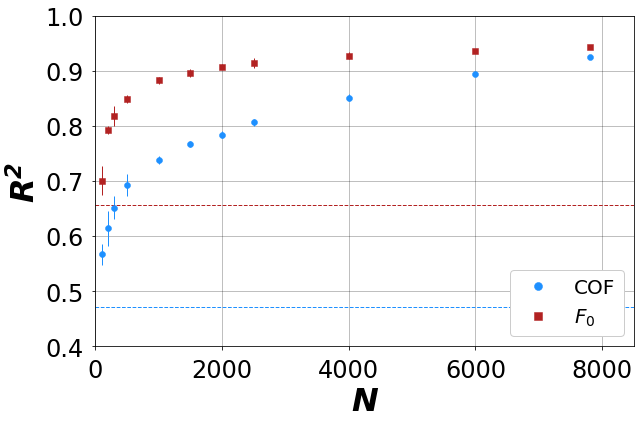

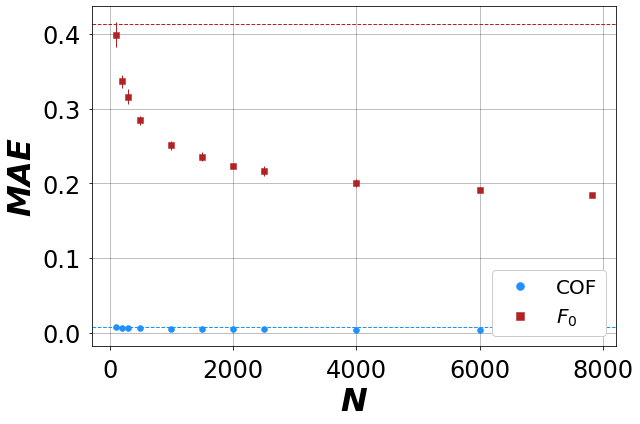

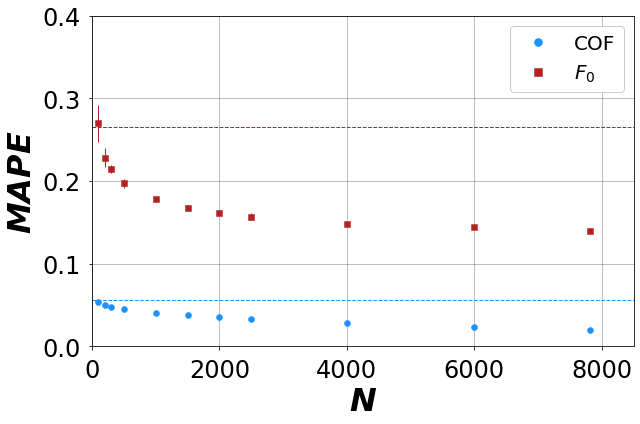

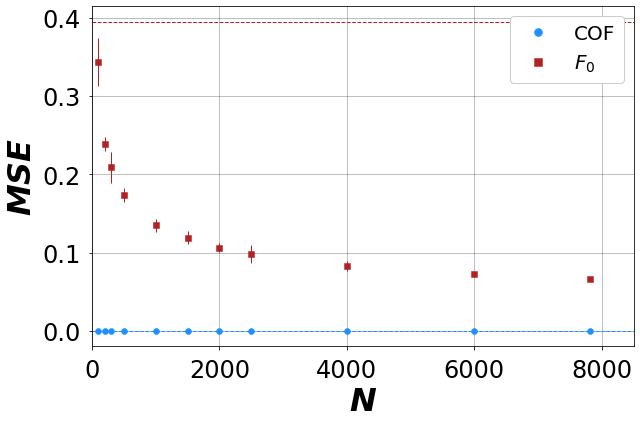

In [140]:
to_plot_on_5050 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'mae_avg': list(),
                           'mae_std': list(), 
                           'mape_avg': list(),
                           'mape_std': list(),
                           'mse_avg': list(),
                           'mse_std': list(),
                           'base_r_square': None, 
                           'base_mae': None, 
                           'base_mape': None,
                           'base_mse': None,
                          },
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'mae_avg': list(),
                                 'mae_std': list(), 
                                 'mape_avg': list(),
                                 'mape_std': list(),
                                 'mse_avg': list(),
                                 'mse_std': list(),
                                 'base_r_square': None,
                                 'base_mae': None, 
                                 'base_mape': None,
                                 'base_mse': None
                                }
                  }
for target in ['COF', 'intercept']:
    for model, data in results['5050'][target].items():
        if 'everything' in model:
            to_plot_on_5050[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_5050[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_5050[target]['mae_avg'].append(data['mae_avg'])
            to_plot_on_5050[target]['mae_std'].append(data['mae_std'])
            to_plot_on_5050[target]['mape_avg'].append(data['mape_avg'])
            to_plot_on_5050[target]['mape_std'].append(data['mape_std'])
            to_plot_on_5050[target]['mse_avg'].append(data['mse_avg'])
            to_plot_on_5050[target]['mse_std'].append(data['mse_std'])
            to_plot_on_5050[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_5050[target]['base_r_square'] = data['r_square']
            to_plot_on_5050[target]['base_mae'] = data['mae']
            to_plot_on_5050[target]['base_mape'] = data['mape']
            to_plot_on_5050[target]['base_mse'] = data['mse']

#Fig 1, R2 
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 8500)
plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['r_square_avg'],
            yerr=to_plot_on_5050['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_r_square'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['r_square_avg'],
            yerr=to_plot_on_5050['intercept']['r_square_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_r_square'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/r2vsN/everything_on_5050.pdf', dpi=500)


#Fig 2, MAE
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAE}$')
#plt.xlim(0, 8500)
#plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['mae_avg'],
            yerr=to_plot_on_5050['COF']['mae_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_mae'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['mae_avg'],
            yerr=to_plot_on_5050['intercept']['mae_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_mae'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})

plt.savefig(fname='./plots/maevsN/everything_on_5050.pdf', dpi=500)

#Fig 3, MAPE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAPE}$')
plt.xlim(0, 8500)
plt.ylim(0, 0.4)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['mape_avg'],
            yerr=to_plot_on_5050['COF']['mape_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_mape'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['mape_avg'],
            yerr=to_plot_on_5050['intercept']['mape_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_mape'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})
plt.savefig(fname='./plots/mapevsN/everything_on_5050.pdf', dpi=500)

#Fig 4, MSE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MSE}$')
plt.xlim(0, 8500)
#plt.ylim(0, 0.3)

plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['mse_avg'],
            yerr=to_plot_on_5050['COF']['mse_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['COF']['base_mse'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['mse_avg'],
            yerr=to_plot_on_5050['intercept']['mse_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_5050['intercept']['base_mse'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})
plt.savefig(fname='./plots/msevsN/everything_on_5050.pdf', dpi=500)


# Refined R<sup>2</sup> plot 
### Mixed 5050 models on 2575 test set

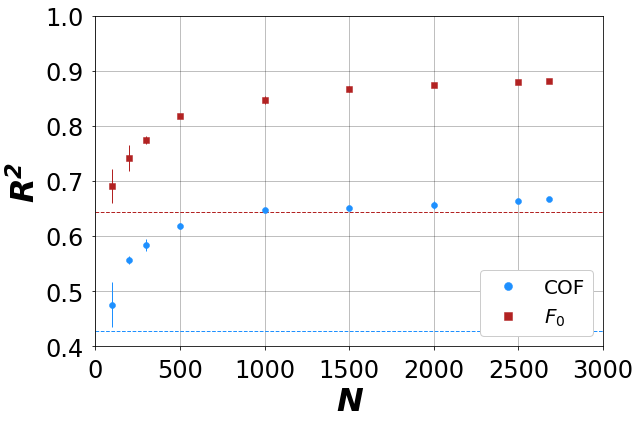

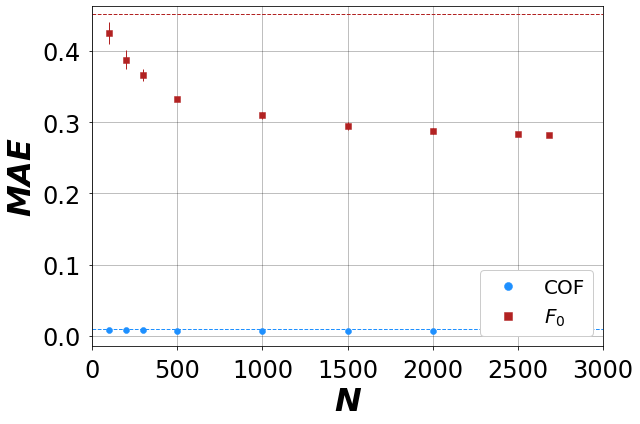

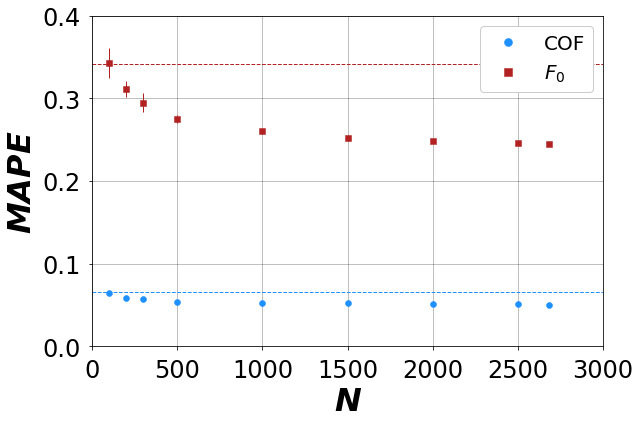

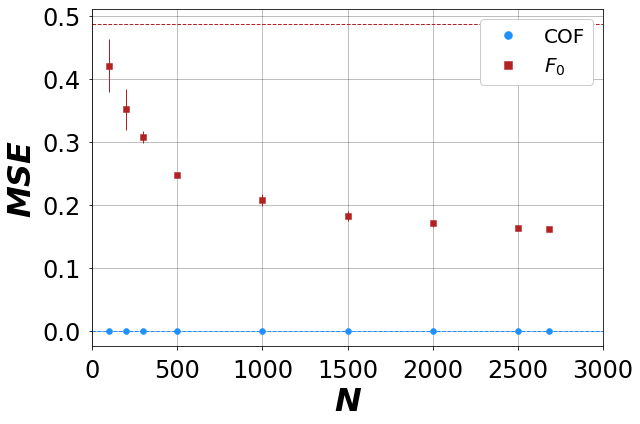

In [139]:
to_plot_on_2575 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'mae_avg': list(),
                           'mae_std': list(), 
                           'mape_avg': list(),
                           'mape_std': list(),
                           'mse_avg': list(),
                           'mse_std': list(),
                           'base_r_square': None, 
                           'base_mae': None, 
                           'base_mape': None,
                           'base_mse': None
                          },
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'mae_avg': list(),
                                 'mae_std': list(), 
                                 'mape_avg': list(),
                                 'mape_std': list(),
                                 'mse_avg': list(),
                                 'mse_std': list(),
                                 'base_r_square': None,
                                 'base_mae': None, 
                                 'base_mape': None,
                                 'base_mse': None}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if '5050' in model:
            to_plot_on_2575[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_2575[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_2575[target]['mae_avg'].append(data['mae_avg'])
            to_plot_on_2575[target]['mae_std'].append(data['mae_std'])
            to_plot_on_2575[target]['mape_avg'].append(data['mape_avg'])
            to_plot_on_2575[target]['mape_std'].append(data['mape_std'])
            to_plot_on_2575[target]['mse_avg'].append(data['mse_avg'])
            to_plot_on_2575[target]['mse_std'].append(data['mse_std'])
            to_plot_on_2575[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_2575[target]['base_r_square'] = data['r_square']
            to_plot_on_2575[target]['base_mae'] = data['mae']
            to_plot_on_2575[target]['base_mape'] = data['mape']
            to_plot_on_2575[target]['base_mse'] = data['mse']


#Fig 1, R2 
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 3000)
plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['r_square_avg'],
            yerr=to_plot_on_2575['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_r_square'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['r_square_avg'],
            yerr=to_plot_on_2575['intercept']['r_square_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_r_square'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/r2vsN/5050_on_2575.pdf', dpi=500)


#Fig 2, MAE
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAE}$')
plt.xlim(0, 3000)
#plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['mae_avg'],
            yerr=to_plot_on_2575['COF']['mae_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_mae'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['mae_avg'],
            yerr=to_plot_on_2575['intercept']['mae_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_mae'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]

plt.legend(handles=legend_elements, loc=4, prop={'size': 20})

plt.savefig(fname='./plots/maevsN/5050_on_2575.pdf', dpi=500)

#Fig 3, MAPE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAPE}$')
plt.xlim(0, 3000)
plt.ylim(0, 0.4)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['mape_avg'],
            yerr=to_plot_on_2575['COF']['mape_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_mape'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['mape_avg'],
            yerr=to_plot_on_2575['intercept']['mape_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_mape'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/mapevsN/5050_on_2575.pdf', dpi=500)

#Fig 4, MSE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MSE}$')
plt.xlim(0, 3000)
#plt.ylim(0, 0.3)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['mse_avg'],
            yerr=to_plot_on_2575['COF']['mse_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_mse'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['mse_avg'],
            yerr=to_plot_on_2575['intercept']['mse_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_mse'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/msevsN/5050_on_2575.pdf', dpi=500)


# Refined R<sup>2</sup> plot 
### Everything models on 2575 test set

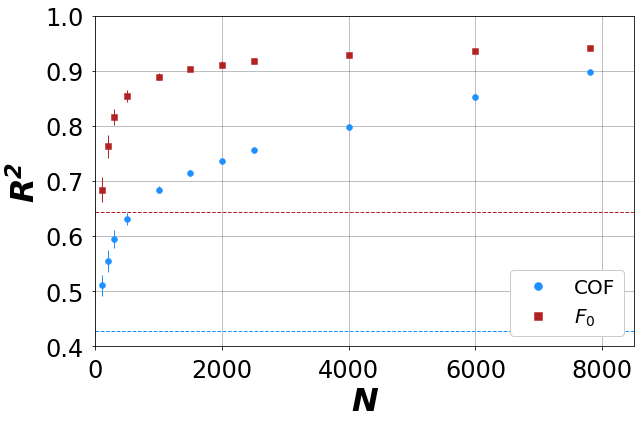

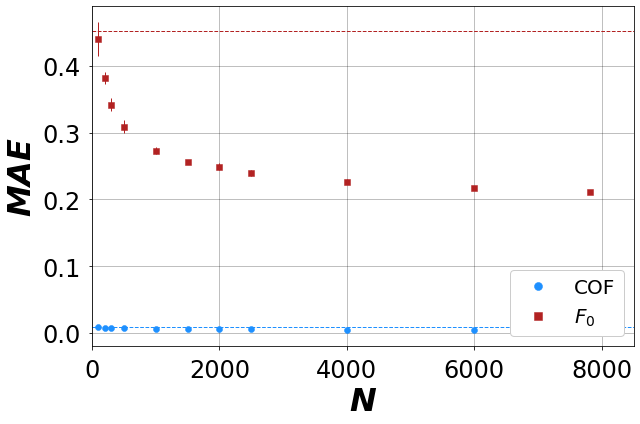

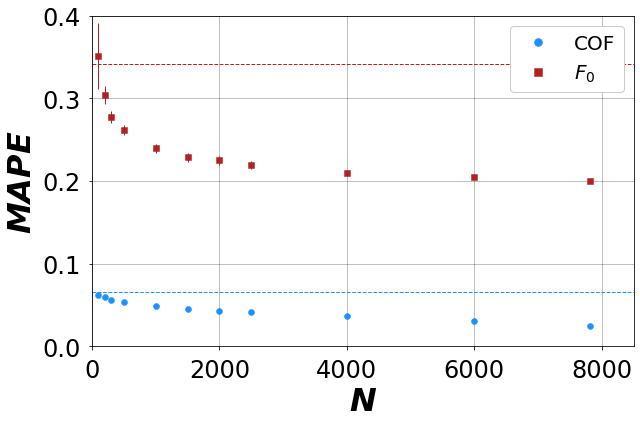

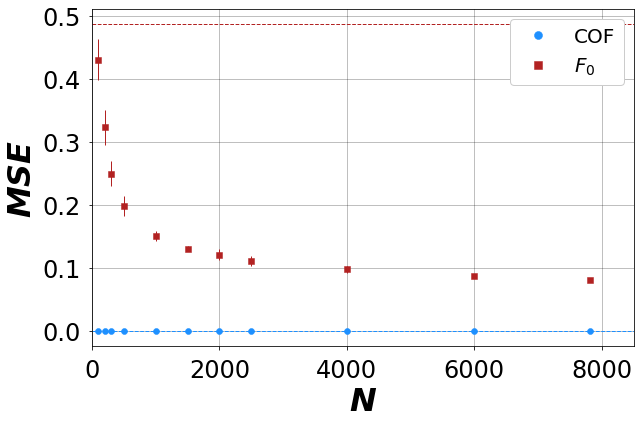

In [138]:
to_plot_on_2575 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'mae_avg': list(),
                           'mae_std': list(), 
                           'mape_avg': list(),
                           'mape_std': list(),
                           'mse_avg': list(),
                           'mse_std': list(),
                           'base_r_square': None, 
                           'base_mae': None, 
                           'base_mape': None,
                           'base_mse': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'mae_avg': list(),
                                 'mae_std': list(), 
                                 'mape_avg': list(),
                                 'mape_std': list(),
                                 'mse_avg': list(),
                                 'mse_std': list(),
                                 'base_r_square': None,
                                 'base_mae': None, 
                                 'base_mape': None,
                                 'base_mse': None}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if 'everything' in model:
            to_plot_on_2575[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_2575[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_2575[target]['mae_avg'].append(data['mae_avg'])
            to_plot_on_2575[target]['mae_std'].append(data['mae_std'])
            to_plot_on_2575[target]['mape_avg'].append(data['mape_avg'])
            to_plot_on_2575[target]['mape_std'].append(data['mape_std'])
            to_plot_on_2575[target]['mse_avg'].append(data['mse_avg'])
            to_plot_on_2575[target]['mse_std'].append(data['mse_std'])
            to_plot_on_2575[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_2575[target]['base_r_square'] = data['r_square']
            to_plot_on_2575[target]['base_mae'] = data['mae']
            to_plot_on_2575[target]['base_mape'] = data['mape']
            to_plot_on_2575[target]['base_mse'] = data['mse']


#Fig 1, R2 
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 8500)
plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['r_square_avg'],
            yerr=to_plot_on_2575['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_r_square'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['r_square_avg'],
            yerr=to_plot_on_2575['intercept']['r_square_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_r_square'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/r2vsN/everything_on_2575.pdf', dpi=500)


#Fig 2, MAE
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAE}$')
plt.xlim(0, 8500)
#plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['mae_avg'],
            yerr=to_plot_on_2575['COF']['mae_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_mae'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['mae_avg'],
            yerr=to_plot_on_2575['intercept']['mae_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_mae'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/maevsN/everything_on_2575.pdf', dpi=500)

#Fig 3, MAPE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAPE}$')
plt.xlim(0, 8500)
plt.ylim(0, 0.4)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['mape_avg'],
            yerr=to_plot_on_2575['COF']['mape_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_mape'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['mape_avg'],
            yerr=to_plot_on_2575['intercept']['mape_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_mape'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})
plt.savefig(fname='./plots/mapevsN/everything_on_2575.pdf', dpi=500)


#Fig 4, MSE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MSE}$')
plt.xlim(0, 8500)
#plt.ylim(0, 0.3)

plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['mse_avg'],
            yerr=to_plot_on_2575['COF']['mse_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['COF']['base_mse'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['mse_avg'],
            yerr=to_plot_on_2575['intercept']['mse_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_2575['intercept']['base_mse'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})
plt.savefig(fname='./plots/msevsN/everything_on_2575.pdf', dpi=500)


# Refined R<sup>2</sup> plot 
### Everything model on everything test set

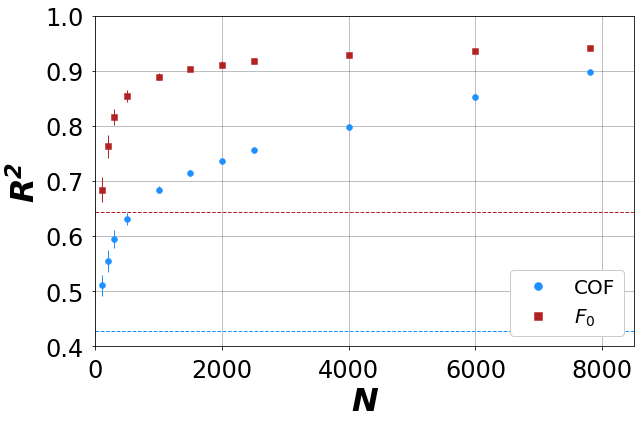

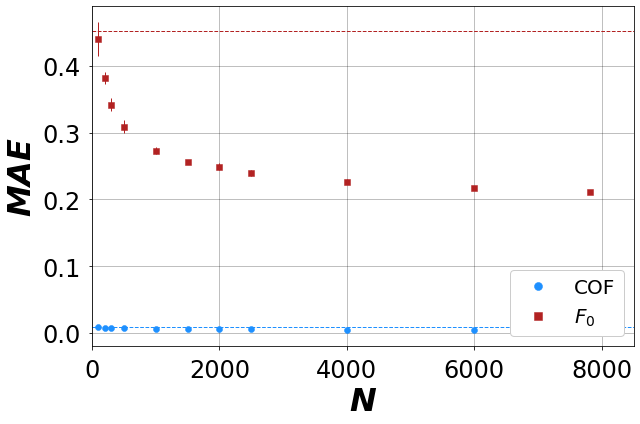

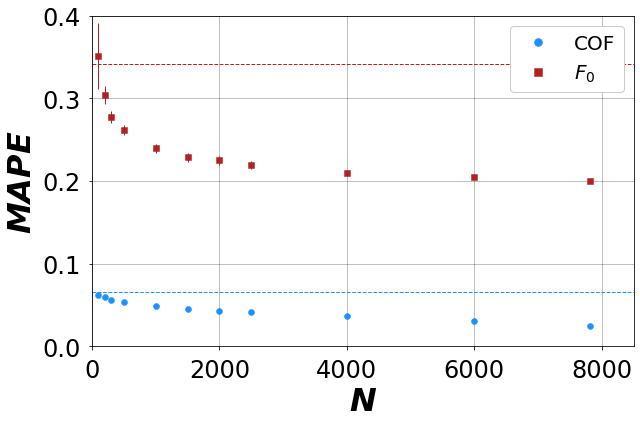

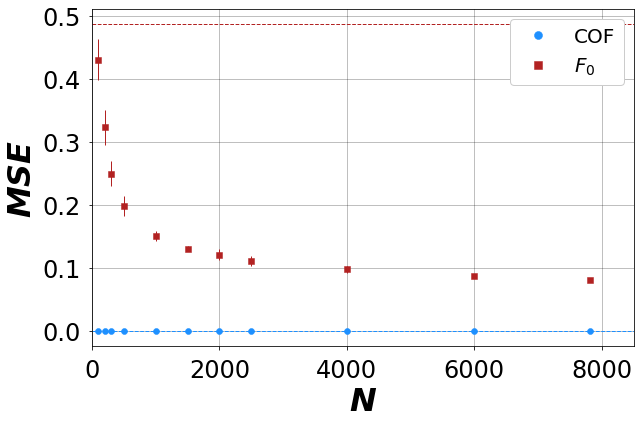

In [137]:
to_plot_on_everything = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'mae_avg': list(),
                           'mae_std': list(), 
                           'mape_avg': list(),
                           'mape_std': list(),
                           'mse_avg': list(), 
                           'mse_std': list(),
                           'base_r_square': None, 
                           'base_mae': None, 
                           'base_mape': None,
                           'base_mse': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'mae_avg': list(),
                                 'mae_std': list(), 
                                 'mape_avg': list(),
                                 'mape_std': list(),
                                 'mse_avg': list(),
                                 'mse_std': list(),
                                 'base_r_square': None,
                                 'base_mae': None, 
                                 'base_mape': None,
                                 'base_mse': None}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if 'everything' in model:
            to_plot_on_everything[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_everything[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_everything[target]['mae_avg'].append(data['mae_avg'])
            to_plot_on_everything[target]['mae_std'].append(data['mae_std'])
            to_plot_on_everything[target]['mape_avg'].append(data['mape_avg'])
            to_plot_on_everything[target]['mape_std'].append(data['mape_std'])
            to_plot_on_everything[target]['mse_avg'].append(data['mse_avg'])
            to_plot_on_everything[target]['mse_std'].append(data['mse_std'])
            to_plot_on_everything[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_everything[target]['base_r_square'] = data['r_square']
            to_plot_on_everything[target]['base_mae'] = data['mae']
            to_plot_on_everything[target]['base_mape'] = data['mape']
            to_plot_on_everything[target]['base_mse'] = data['mse']


#Fig 1, R2 
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 8500)
plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['r_square_avg'],
            yerr=to_plot_on_everything['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_r_square'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['r_square_avg'],
            yerr=to_plot_on_everything['intercept']['r_square_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_r_square'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/r2vsN/everything_on_everything.pdf', dpi=500)


#Fig 2, MAE
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAE}$')
plt.xlim(0, 8500)
#plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['mae_avg'],
            yerr=to_plot_on_everything['COF']['mae_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_mae'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['mae_avg'],
            yerr=to_plot_on_everything['intercept']['mae_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_mae'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/maevsN/everything_on_everything.pdf', dpi=500)

#Fig 3, MAPE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAPE}$')
plt.xlim(0, 8500)
plt.ylim(0, 0.4)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['mape_avg'],
            yerr=to_plot_on_everything['COF']['mape_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_mape'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['mape_avg'],
            yerr=to_plot_on_everything['intercept']['mape_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_mape'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/mapevsN/everything_on_everything.pdf', dpi=500)

#Fig 4, MSE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MSE}$')
plt.xlim(0, 8500)
#plt.ylim(0, 0.3)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['mse_avg'],
            yerr=to_plot_on_everything['COF']['mse_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_mse'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['mse_avg'],
            yerr=to_plot_on_everything['intercept']['mse_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_mse'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/msevsN/everything_on_everything.pdf', dpi=500)



# Refined R<sup>2</sup> plot 
### 5050 model on everything test set

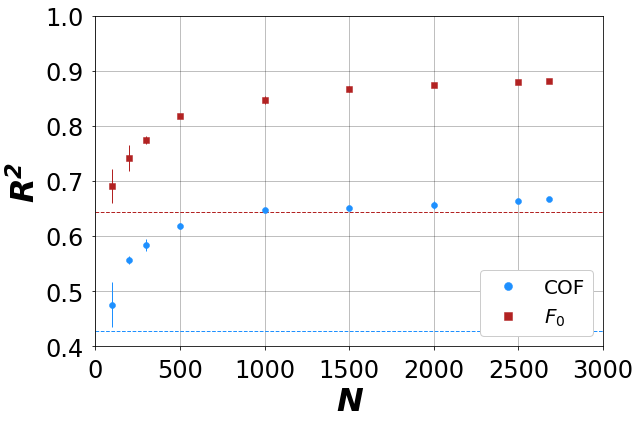

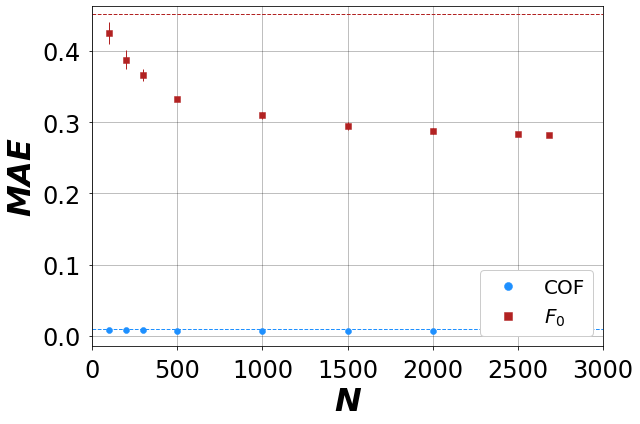

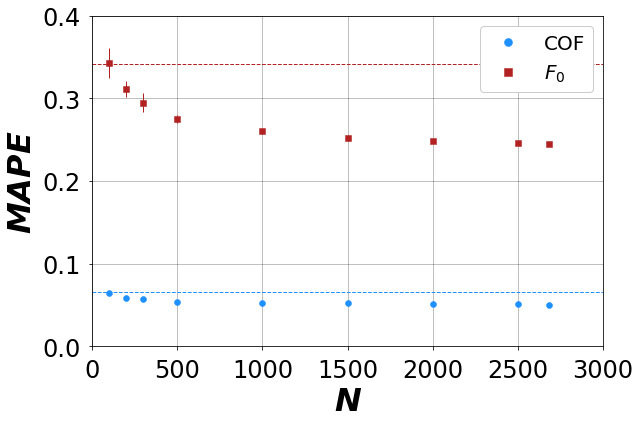

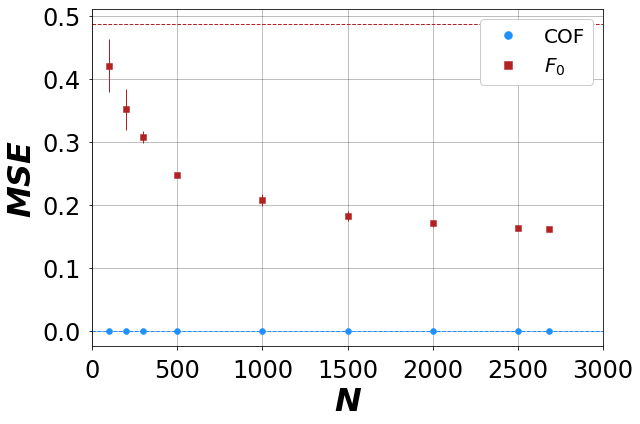

In [136]:
to_plot_on_everything = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list(),
                           'mae_avg': list(),
                           'mae_std': list(), 
                           'mape_avg': list(),
                           'mape_std': list(),
                           'mse_avg': list(),
                           'mse_std': list(),
                           'base_r_square': None, 
                           'base_mae': None, 
                           'base_mape': None,
                           'base_mse': None},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list(),
                                 'mae_avg': list(),
                                 'mae_std': list(), 
                                 'mape_avg': list(),
                                 'mape_std': list(),
                                 'mse_avg': list(),
                                 'mse_std': list(),
                                 'base_r_square': None,
                                 'base_mae': None, 
                                 'base_mape': None,
                                 'base_mse': None}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if '5050' in model:
            to_plot_on_everything[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_everything[target]['r_square_std'].append(data['r_square_std'])
            to_plot_on_everything[target]['mae_avg'].append(data['mae_avg'])
            to_plot_on_everything[target]['mae_std'].append(data['mae_std'])
            to_plot_on_everything[target]['mape_avg'].append(data['mape_avg'])
            to_plot_on_everything[target]['mape_std'].append(data['mape_std'])
            to_plot_on_everything[target]['mse_avg'].append(data['mse_avg'])
            to_plot_on_everything[target]['mse_std'].append(data['mse_std'])
            to_plot_on_everything[target]['n_train'].append(data['n_train'])
        elif 'original' in model: 
            to_plot_on_everything[target]['base_r_square'] = data['r_square']
            to_plot_on_everything[target]['base_mae'] = data['mae']
            to_plot_on_everything[target]['base_mape'] = data['mape']
            to_plot_on_everything[target]['base_mse'] = data['mse']


#Fig 1, R2 
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{R^2}$')
plt.xlim(0, 3000)
plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['r_square_avg'],
            yerr=to_plot_on_everything['COF']['r_square_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_r_square'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['r_square_avg'],
            yerr=to_plot_on_everything['intercept']['r_square_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_r_square'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/r2vsN/5050_on_everything.pdf', dpi=500)


#Fig 2, MAE
plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAE}$')
plt.xlim(0, 3000)
#plt.ylim(0.4, 1)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['mae_avg'],
            yerr=to_plot_on_everything['COF']['mae_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_mae'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['mae_avg'],
            yerr=to_plot_on_everything['intercept']['mae_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_mae'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc=4, prop={'size': 20})
plt.savefig(fname='./plots/maevsN/5050_on_everything.pdf', dpi=500)


#Fig 3, MAPE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MAPE}$')
plt.xlim(0, 3000)
plt.ylim(0, 0.4)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['mape_avg'],
            yerr=to_plot_on_everything['COF']['mape_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_mape'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['mape_avg'],
            yerr=to_plot_on_everything['intercept']['mape_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_mape'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/mapevsN/5050_on_everything.pdf', dpi=500)

#Fig 4, MSE

plt.figure(figsize=(9, 6))

plt.xlabel('N', style='italic')
plt.ylabel(r'$\mathbf{MSE}$')
plt.xlim(0, 3000)
#plt.ylim(0, 0.3)

plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['mse_avg'],
            yerr=to_plot_on_everything['COF']['mse_std'],
            color=COF_color,
            fmt='o',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['COF']['base_mse'], linestyle='--', linewidth=1, color=COF_color)

plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['mse_avg'],
            yerr=to_plot_on_everything['intercept']['mse_std'],
            color=F0_color,
            fmt='s',
            markersize=markersize,
            elinewidth=1)
plt.axhline(y=to_plot_on_everything['intercept']['base_mse'], linestyle='--', linewidth=1, color=F0_color)

legend_elements = [Line2D([0], [0], marker='o', color=COF_color, linestyle='', label='COF'),
                   Line2D([0], [0], marker='s', color=F0_color, linestyle='', label=r'$\mathit{F_0}$')]
plt.legend(handles=legend_elements, loc="upper right", prop={'size': 20})

plt.savefig(fname='./plots/msevsN/5050_on_everything.pdf', dpi=500)


# Summary Table

In [116]:
import pandas as pd

In [117]:
# R square summary
pd_dict = {'model_name' : list(),
           'n_trains' : list(),
           '5050_COF' : list(),
           '5050_F0' : list(),
           '2575_COF' : list(),
           '2575_F0' : list(),
           'everything_COF' : list(),
           'everything_F0' : list()}

# Handle original models 
pd_dict['model_name'].append('original')
pd_dict['n_trains'].append(100)
for tset in ['5050', '2575', 'everything']:
    pd_dict[f'{tset}_COF'].append(round(results[tset]['COF']['original']['r_square'], 3))
    pd_dict[f'{tset}_F0'].append(round(results[tset]['intercept']['original']['r_square'], 3))



# Handle 5050 models
for point in mpoints:
    model_name = f'5050_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['COF'][model_name]['r_square_std'], 3)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['intercept'][model_name]['r_square_std'], 3)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
        
# Handle 2575 models

for point in epoints:
    model_name = f'everything_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['COF'][model_name]['r_square_std'], 3)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['r_square_avg'], 3)} \u00B1 {round(results[tset]['intercept'][model_name]['r_square_std'], 3)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
r2df = pd.DataFrame(pd_dict)
r2df.to_csv('plots/summary_r2.csv')

In [118]:
r2df

,model_name,n_trains,5050_COF,5050_F0,2575_COF,2575_F0,everything_COF,everything_F0
0,original,100,0.472,0.657,0.429,0.643,0.443,0.648
1,5050_100,100,0.543 ± 0.063,0.722 ± 0.058,0.475 ± 0.041,0.692 ± 0.031,0.496 ± 0.046,0.701 ± 0.032
2,5050_200,200,0.647 ± 0.012,0.792 ± 0.033,0.557 ± 0.008,0.742 ± 0.024,0.584 ± 0.008,0.757 ± 0.026
3,5050_300,300,0.687 ± 0.017,0.826 ± 0.011,0.584 ± 0.011,0.774 ± 0.007,0.615 ± 0.013,0.79 ± 0.007
4,5050_500,500,0.734 ± 0.004,0.859 ± 0.008,0.618 ± 0.005,0.819 ± 0.002,0.653 ± 0.004,0.831 ± 0.004
5,5050_1000,1000,0.799 ± 0.007,0.885 ± 0.01,0.647 ± 0.001,0.848 ± 0.007,0.693 ± 0.002,0.859 ± 0.005
6,5050_1500,1500,0.835 ± 0.011,0.907 ± 0.007,0.652 ± 0.004,0.867 ± 0.006,0.706 ± 0.005,0.879 ± 0.003
7,5050_2000,2000,0.88 ± 0.004,0.92 ± 0.002,0.656 ± 0.007,0.875 ± 0.004,0.723 ± 0.006,0.888 ± 0.003
8,5050_2500,2500,0.915 ± 0.003,0.927 ± 0.001,0.664 ± 0.003,0.881 ± 0.001,0.739 ± 0.002,0.895 ± 0.001
9,5050_all,all,0.926 ± 0.0,0.928 ± 0.0,0.668 ± 0.0,0.882 ± 0.0,0.745 ± 0.0,0.896 ± 0.0


In [119]:
# MAE summary
pd_dict = {'model_name' : list(),
           'n_trains' : list(),
           '5050_COF' : list(),
           '5050_F0' : list(),
           '2575_COF' : list(),
           '2575_F0' : list(),
           'everything_COF' : list(),
           'everything_F0' : list()}

# Handle original models 
pd_dict['model_name'].append('original')
pd_dict['n_trains'].append(100)
for tset in ['5050', '2575', 'everything']:
    pd_dict[f'{tset}_COF'].append(round(results[tset]['COF']['original']['mae'], 7))
    pd_dict[f'{tset}_F0'].append(round(results[tset]['intercept']['original']['mae'], 7))



# Handle 5050 models
for point in mpoints:
    model_name = f'5050_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['mae_avg'], 4)} \u00B1 {round(results[tset]['COF'][model_name]['mae_std'], 4)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['mae_avg'], 4)} \u00B1 {round(results[tset]['intercept'][model_name]['mae_std'], 4)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
        
# Handle 2575 models

for point in epoints:
    model_name = f'everything_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['mae_avg'], 4)} \u00B1 {round(results[tset]['COF'][model_name]['mae_std'], 4)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['mae_avg'], 4)} \u00B1 {round(results[tset]['intercept'][model_name]['mae_std'], 4)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
maedf = pd.DataFrame(pd_dict)
maedf.to_csv('plots/summary_mae.csv')

In [121]:
# MAPE summary
pd_dict = {'model_name' : list(),
           'n_trains' : list(),
           '5050_COF' : list(),
           '5050_F0' : list(),
           '2575_COF' : list(),
           '2575_F0' : list(),
           'everything_COF' : list(),
           'everything_F0' : list()}

# Handle original models 
pd_dict['model_name'].append('original')
pd_dict['n_trains'].append(100)
for tset in ['5050', '2575', 'everything']:
    pd_dict[f'{tset}_COF'].append(round(results[tset]['COF']['original']['mape'], 4))
    pd_dict[f'{tset}_F0'].append(round(results[tset]['intercept']['original']['mape'], 3))



# Handle 5050 models
for point in mpoints:
    model_name = f'5050_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['mape_avg'], 4)} \u00B1 {round(results[tset]['COF'][model_name]['mape_std'], 3)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['mape_avg'], 3)} \u00B1 {round(results[tset]['intercept'][model_name]['mape_std'], 3)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
        
# Handle 2575 models

for point in epoints:
    model_name = f'everything_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['mape_avg'], 4)} \u00B1 {round(results[tset]['COF'][model_name]['mape_std'], 4)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['mape_avg'], 3)} \u00B1 {round(results[tset]['intercept'][model_name]['mape_std'], 3)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
mapedf = pd.DataFrame(pd_dict)
mapedf.to_csv('plots/summary_mape.csv')

In [122]:
mapedf

,model_name,n_trains,5050_COF,5050_F0,2575_COF,2575_F0,everything_COF,everything_F0
0,original,100,0.0565,0.266,0.0653,0.341,0.0623,0.315
1,5050_100,100,0.0546 ± 0.003,0.259 ± 0.016,0.0643 ± 0.002,0.343 ± 0.018,0.061 ± 0.003,0.315 ± 0.016
2,5050_200,200,0.0478 ± 0.001,0.224 ± 0.011,0.0589 ± 0.001,0.312 ± 0.009,0.0551 ± 0.001,0.282 ± 0.01
3,5050_300,300,0.0447 ± 0.001,0.212 ± 0.007,0.0568 ± 0.001,0.295 ± 0.011,0.0527 ± 0.001,0.267 ± 0.009
4,5050_500,500,0.0407 ± 0.001,0.193 ± 0.004,0.0542 ± 0.0,0.275 ± 0.005,0.0496 ± 0.0,0.247 ± 0.004
5,5050_1000,1000,0.0339 ± 0.001,0.175 ± 0.003,0.0521 ± 0.0,0.26 ± 0.003,0.0459 ± 0.0,0.231 ± 0.002
6,5050_1500,1500,0.0301 ± 0.001,0.163 ± 0.001,0.052 ± 0.0,0.253 ± 0.004,0.0445 ± 0.001,0.222 ± 0.002
7,5050_2000,2000,0.0251 ± 0.0,0.155 ± 0.002,0.0513 ± 0.001,0.248 ± 0.002,0.0423 ± 0.0,0.217 ± 0.001
8,5050_2500,2500,0.0209 ± 0.0,0.152 ± 0.002,0.0508 ± 0.0,0.246 ± 0.001,0.0406 ± 0.0,0.213 ± 0.001
9,5050_all,all,0.0196 ± 0.0,0.15 ± 0.0,0.0505 ± 0.0,0.245 ± 0.0,0.0399 ± 0.0,0.213 ± 0.0


In [134]:
# MSE summary
pd_dict = {'model_name' : list(),
           'n_trains' : list(),
           '5050_COF' : list(),
           '5050_F0' : list(),
           '2575_COF' : list(),
           '2575_F0' : list(),
           'everything_COF' : list(),
           'everything_F0' : list()}

# Handle original models 
pd_dict['model_name'].append('original')
pd_dict['n_trains'].append(100)
for tset in ['5050', '2575', 'everything']:
    pd_dict[f'{tset}_COF'].append(round(results[tset]['COF']['original']['mse'], 5))
    pd_dict[f'{tset}_F0'].append(round(results[tset]['intercept']['original']['mse'], 5))



# Handle 5050 models
for point in mpoints:
    model_name = f'5050_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['mape_avg'], 5)} \u00B1 {round(results[tset]['COF'][model_name]['mse_std'], 5)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['mape_avg'], 5)} \u00B1 {round(results[tset]['intercept'][model_name]['mse_std'], 5)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
        
# Handle 2575 models

for point in epoints:
    model_name = f'everything_{point}'
    pd_dict['model_name'].append(model_name)
    pd_dict['n_trains'].append(point)
    for tset in ['5050', '2575', 'everything']:
        COF = f"{round(results[tset]['COF'][model_name]['mape_avg'], 5)} \u00B1 {round(results[tset]['COF'][model_name]['mse_std'], 5)}"
        F0 = f"{round(results[tset]['intercept'][model_name]['mape_avg'], 5)} \u00B1 {round(results[tset]['intercept'][model_name]['mse_std'], 5)}"

        pd_dict[f'{tset}_COF'].append(COF)
        pd_dict[f'{tset}_F0'].append(F0)
        
msedf = pd.DataFrame(pd_dict)
msedf.to_csv('plots/summary_mse.csv')

In [135]:
msedf

,model_name,n_trains,5050_COF,5050_F0,2575_COF,2575_F0,everything_COF,everything_F0
0,original,100,0.0001,0.39463,0.00013,0.48673,0.00012,0.45518
1,5050_100,100,0.05456 ± 1e-05,0.25929 ± 0.06627,0.06433 ± 1e-05,0.34339 ± 0.04205,0.06098 ± 1e-05,0.31459 ± 0.0418
2,5050_200,200,0.04782 ± 0.0,0.22383 ± 0.03822,0.0589 ± 0.0,0.31164 ± 0.03278,0.05511 ± 0.0,0.28156 ± 0.0338
3,5050_300,300,0.04467 ± 0.0,0.21159 ± 0.01304,0.05682 ± 0.0,0.29515 ± 0.00948,0.05266 ± 0.0,0.26653 ± 0.00966
4,5050_500,500,0.04074 ± 0.0,0.19252 ± 0.00901,0.05424 ± 0.0,0.27528 ± 0.00243,0.04961 ± 0.0,0.24693 ± 0.00455
5,5050_1000,1000,0.03394 ± 0.0,0.17486 ± 0.012,0.05213 ± 0.0,0.26029 ± 0.01002,0.0459 ± 0.0,0.23103 ± 0.007
6,5050_1500,1500,0.03013 ± 0.0,0.16331 ± 0.00844,0.05196 ± 0.0,0.25252 ± 0.00792,0.04448 ± 0.0,0.22197 ± 0.00393
7,5050_2000,2000,0.02515 ± 0.0,0.1554 ± 0.00258,0.05131 ± 0.0,0.24841 ± 0.00561,0.04235 ± 0.0,0.21655 ± 0.0042
8,5050_2500,2500,0.02091 ± 0.0,0.15167 ± 0.00154,0.0508 ± 0.0,0.24559 ± 0.00128,0.04056 ± 0.0,0.21342 ± 0.00119
9,5050_all,all,0.01963 ± 0.0,0.14971 ± 0.0005,0.05046 ± 0.0,0.24523 ± 0.00046,0.0399 ± 0.0,0.21251 ± 0.00021
